# FRB Pipeline Simulation

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import *
import gc

In [2]:

def axis_labels(x, y, z):
    xlab = xlabel(x)
    ylab = ylabel(y)
    titles = title(z)
    legends = legend
    return xlab, ylab, titles, legends

def centfinder(x, threshold, length):
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-2]<intensity[i] and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i] and intensity[i+2] < intensity[i]:
            peaksx.append(length[i])
            peaksy.append(intensity[i])
                
    #Calculate the FWHM to compute the size of the peak that we will care about, and then the centroid
    cen = []
    for i in range(len(peaksy)):
        halfmax = peaksy[i]/2
        peak_index = peak_dex.index(peaksy[i])
        pind=(list(inversep_dex)).index(peaksy[i])
        
        for j in range(len((intensity[0:pind]))):
            xmin = (inversep_dex[pind:-1][j] - halfmax)
            xmins = peak_index-j+1
            if xmin < 0 or inversep_dex[pind:-1][j] > peaksy[i]:
                break

        for j in range(len((intensity[0:peak_index] - halfmax))):
            xmax = (intensity[peak_index:-1][j] - halfmax)
            xmaxs = peak_index+j-1
            if xmax < 0 or intensity[peak_index:-1][j] > peaksy[i]:
                break
        
        x_range = length[xmins:xmaxs]
        y_range = x[xmins:xmaxs]
    return x_range, yrange


def peakfinder(x, threshold, array_length):
    """This function finds all maxima above a certain threshold, with the condition that the two points before
    and after the maxima must have values below it."""
    pixels = array_length
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = []
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
    for i in range(len(intensity)-1):
        if intensity[i] > threshold and intensity[i-2]<intensity[i] and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i] and intensity[i+2] < intensity[i]:
            peaksx.append(pixels[i])
            peaksy.append(intensity[i])
    return peaksx, peaksy


def centfinder_cheat(x, threshold):
    """This works well for one spike, not multiple. What is does is it find the peak values and then
    calculates the centroid for all the peaks"""
    pixels = velocities
    intensity = x
    peaksx = [] #This is the values that the peaks are centred around
    peaksy = [np.max(intensity)]
    peak_dex = (list(intensity))
    inversep_dex=intensity[::-1]
                
    #Calculate the FWHM to compute the size of the peak that we will care about, and then the centroid
    cen = []
    for i in range(len(peaksy)):
        halfmax = peaksy[i]/2
        peak_index = peak_dex.index(peaksy[i])
        pind=(list(inversep_dex)).index(peaksy[i])
        
        for i in range(len((intensity[0:pind]))):
            xmin = (inversep_dex[pind:-1][i] - halfmax)
            xmins = peak_index-i+1
            if xmin < 0:
                break

        for i in range(len((intensity[0:peak_index] - halfmax))):
            xmax = (intensity[peak_index:-1][i] - halfmax)
            xmaxs = peak_index+i-1
            if xmax < 0:
                break
        
        x_range = velocities[xmins:xmaxs]
        y_range = x[xmins:xmaxs]

        frequency = np.sum(x_range*y_range)/ np.sum(y_range)
        frequency
        cen.append(frequency)
    return cen

The following steps will simulate the anologue process that occurs before the data is downsampled. Any pulsar will work for this, however, the pulsar being simulated will be made using the paramters below.

In [3]:
#Define the parameters for the noise that will be mixed with the pulse
Cf = 1400e6 #This is the centre frequency in MHz, and where we will be viewing from
Bw = 10e6 #This is the bandwidth that we are observing with our telescope
sample_rate = 12e9 # Frequency running simulation at.
period = .005 #seconds 

With a period of 5ms, we will use a time frame with this length to simulate one pulse. The bins in this simulation is determined by the sampling rate, which can be changed above. The current value is at such that 12GB ram computerss will just be able to simulate. The higher value the sampling rate is given, the more accurate the simulation becomes, but at the expense of what the computer is able to process.

In [4]:
#Define the timescale in which we will be observing
t = np.linspace(-.0025,.0025, period*sample_rate) #Decreasing the period for this will decrease the samples obtained

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


To create the pulsar, first noise is simulated using a normal distribution of values. This distribution is made such that the standard deviation is 1, and is centred around 0. 

In [5]:
#Create the Gaussian noise profile for the pulsar
length = len(t)     #This defines the number of timesamples we have, ie the number of samples collected
mu = 0              #This indicates an offset of 0, meaning the signal is perfetly centred about 0
sigma = 1           #This idicates an std of 1
gnoise = np.random.normal(mu, sigma, length) #This is the GAussian noise for the signal
pw = .0004 #seconds
print(length)

60000000


This noise is then multiplied to a gaussian that has a standard deviation equal to that of the desired pulse width.The gaussian was made using the equation \begin{equation} e^{\frac{-1}{2}(\frac{t}{pw})^2} \end{equation}.

In [6]:
gnoise = np.exp(.5*-(t/pw)**2)*gnoise #Define the pulse of the signal. The gaussian profile takes an input of the 

Observe now that the resulting signal looks like a Gausian distribution

In [7]:
#Now plot the signal, and observe the pulse shape. To see the pulse without destroying the computer, 
#plot every 10000th point
figure()
plot(np.linspace(0,.005, period*sample_rate)[0::10000],gnoise[0::10000], ls='none', marker='.')
axis_labels('time(s)', 'value(unitless)', 'Gaussian noise pulse')

<IPython.core.display.Javascript object>

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


(Text(0.5,0,'time(s)'),
 Text(0,0.5,'value(unitless)'),
 Text(0.5,1,'Gaussian noise pulse'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

Now, to create the pulsar, we take the Fourier transform of the Gaussian, so that we may eliminate all but one frequency of the Gaussian

In [8]:
#Now take the fourier transform of the pulse to get it in frequency space
fourier_pulse = np.fft.fft(gnoise)

The x-axis for the resulting graph is caluclated here. This tells what the frequency step for the broadband noise of the Gaussian is. This is done by taking the fftfreq of the length of the Gaussian, and having it step by the sample rate in units of MHz.

In [9]:
#The fourier transformed data should look like broadband noise, so define the axes properly before plotting
broad_freq = np.fft.fftfreq(length, 1/(sample_rate/1e6)) #This gives the signal in MHz, (specifically from the 1e6)

The plot of the Fourier transform of the Gaussian wave packet is a broadband noise plot as expected.

In [10]:
figure()
plot(broad_freq[::1000], np.abs(fourier_pulse[::1000])) #Square the abs value to get better view
axis_labels("frequency(MHz)", 'amplitude(unitless)', 'Fourier transformed  gaussian pulse')

<IPython.core.display.Javascript object>

(Text(0.5,0,'frequency(MHz)'),
 Text(0,0.5,'amplitude(unitless)'),
 Text(0.5,1,'Fourier transformed  gaussian pulse'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

Now, all frequencies but one are reduced to zero through filtering. To filter, the highpass frequency, or the highest frequency that we wish to observe with our bandwidth, is used to find the point in our data that is set as an index.....

In [11]:
#Now we modify the noise, so that there are only +- of the same frequency in it of it. This is the pulsar!
#Everything outside the two reference frequencies is turned to zero
highpass_freq = (Cf-Bw/2.0) #This sets the centre frequency to 0, with a bandwidth deifned above
highpass_index1 = int(highpass_freq/(sample_rate/2)*length/2) #This finds the point in the array with the value
highpass_index2 = length - highpass_index1 #Same but for different point
fourier_pulse[:highpass_index1] = 0 #This is turning everything outside the two points to zero
fourier_pulse[highpass_index2:] = 0 #Same as above

#Everything outside of the two frequencies is turned to 0
nyquest_index = int(length/2) #This value is determined by the nyquist sampling theorem(helps figure out where the chinkc are)
#The following is the same as above, but now for outside the frequency values
lowpass_freq = Cf+Bw/2.0 
lowpass_index1 = int(lowpass_freq/(sample_rate/2)*length/2)
lowpass_index2 = length - lowpass_index1
fourier_pulse[lowpass_index1:nyquest_index] = 0
fourier_pulse[nyquest_index:lowpass_index2] = 0

In [12]:
figure()
plot(broad_freq[::1000], np.abs(fourier_pulse[::1000]))
axis_labels("frequency(MHz)", 'amplitude(unitless)', 'Newly created pulsar')

<IPython.core.display.Javascript object>

(Text(0.5,0,'frequency(MHz)'),
 Text(0,0.5,'amplitude(unitless)'),
 Text(0.5,1,'Newly created pulsar'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

Now that all but the absolute value of one frequency has been given a value of zero, we have created our pulsar. The pulsar is now changed back into the time domain using an inverse fourier transform, and still looks like a Gaussian wave packet as desired. 

In [13]:
#Now turn the pulsar back into time space from frequency space
blimited_pulse = np.fft.ifft(fourier_pulse)

In [14]:
#If this pulse is plotted again, it sill looks like the same as before
figure()
plot(np.linspace(0,.005, period*sample_rate)[0::10000], blimited_pulse[::10000])
axis_labels('time(s)', 'value(unitless)', 'Pulsar wave packet')

<IPython.core.display.Javascript object>

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/andy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(Text(0.5,0,'time(s)'),
 Text(0,0.5,'value(unitless)'),
 Text(0.5,1,'Pulsar wave packet'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

To simulate what the computer recieves after the telescope detects the signal, we need to create a mixing signal which will be used to downsample the data. This mixing signal is created using the complex Euler equation:
$e^{-2\pi j *\frac{Cf}{samp}*len}$, where Cf is defined as above, samp is the sample rate, and len is the array with size length, with step size of 1. It is also assumed that the pulse currently is centred around the same point, x=0, which eliminates the \omega that is in the original equation.

In [15]:
#Now need to create the mixing signal:
mixing_signal = np.exp(-2.00j*np.pi* Cf/sample_rate *np.arange(length)) #With this we create the mixing signal using the euler equation for the signal

#We assume the pulse is always centred around the same point, so the only part of the signal equaiton needed is 
#omega*t. 

The pulse is then multiplied to the mixing signal. The fourier transform of this new signal is then taken, and a lowpass filter is applied to it. This is to create an IQ data set for the bandwidth. This filter was made using the nyquist sampling theorem to prevent oversampling with the bandwidth specified. The inverse fourier transform of this signal is then taken, and it is downsampled by taking only samples that have spcings of the $\frac{sample\_ rate}{bandwidth}$

In [16]:

#Mix and sample down the pusar signal so that we can have an I Q data set for the bandwidth
mixedd_down_s = blimited_pulse*mixing_signal
N_cutoff = int(Bw/2/sample_rate*length) #This is from the lowpass fileter definition
fmixed = np.fft.fft(mixedd_down_s) #This creates the fourier transform of the mixed signal
fmixed[N_cutoff:-N_cutoff] = 0.0 # this makes it so that the imaginary magnitudes are comparable to the reals. This is
                                    #also our filter
filtered_mixed_downs_s = np.fft.ifft(fmixed) #This brings the fourier space pulse back into a packet
#Downsample so that is...
downsampled_filtered_mixed_down_s = filtered_mixed_downs_s[::int(sample_rate/(Bw))]
#complex sampled at 10MHz instead of 12GHz
#This gives us 50000 indicies instead of 60000000

To open up more RAM in the computer, variables that will no longer be used are forgotten

In [17]:
#%reset_selective -f 't'
%reset_selective -f gnoise 
%reset_selective -f fourier_pulse
%reset_selective -f broad_freq
%reset_selective -f blimited_pulse
%reset_selective -f mixing_signal
%reset_selective -f mixedd_down_s
%reset_selective -f N_cutoff
%reset_selective -f fmixed
%reset_selective -f filtered_mixed_downs_s


In [18]:
from matplotlib.pyplot import *


The pulse is now downsampled, and realistically, this is where the simulation can begin. The previous lines of code were used to demponstrate how the anologue to digital converter chain works. Now, the new downsampled signal will be plotted below. Again, this pulsar signal still looks like a wave packet. 

In [19]:
#The simulation can be run from this point


# Use gaussian noise, filter with same time width.
#Now plot the signal, and observe that the pulse shape is the same, but now using smaller increments between samples
figure()
plot(np.linspace(0,.005, len(downsampled_filtered_mixed_down_s))[0:], downsampled_filtered_mixed_down_s[:].real)
plot(np.linspace(0,.005, len(downsampled_filtered_mixed_down_s))[0:], downsampled_filtered_mixed_down_s[:].imag)
axis_labels('Time(s)', 'Amplitude', 'Downsampled Pulsar')

<IPython.core.display.Javascript object>

(Text(0.5,0,'Time(s)'),
 Text(0,0.5,'Amplitude'),
 Text(0.5,1,'Downsampled Pulsar'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

Right now, there is a single pulse, so this is more of an FRB than a pulsar. In order to make this a repeating pulse, use numpy to repeat it. Below, this was done 30 times to get a nice sample of pulses.

In [20]:
#We repeat the pulse to get about 0.15 seconds of data
downsampledd_filtered_mixed_down_s_repeated = np.tile(downsampled_filtered_mixed_down_s, 30)
time_length = .005*30

Now finally, the pulsar is dispersed, which is what the telescope would show the pulsar as. The number of time samples of the new repeated pulse is found, and this is used to find the frequency steps for the pulse. A Dispersion measure (DM) is arbitrarilly chosen. Then the fourier transform of the delay time, given by the equation
\begin{equation}4.15e6 *DM*(\frac{1}{\nu_1^2}-\frac{1}{\nu_2^2}) \end{equation}. This equation assumes a frequency given in MHz, however here, it is given in Hz. Therefore, the equation must be divided by 1e9, which is how the constant in the code below is obtained. The fourier transform of this is then taken and convolved to the fourier transform of the pulse to disperse it.

In [39]:
#This is where the pulsar is dispersed
#We do a convolution in fourier space, which must be long wrt the dispersion delay time
dis_length = len(downsampledd_filtered_mixed_down_s_repeated) #This gives us the number of time samples of the 
                                                             #downsampled repeated pulse
freq_step = np.linspace(-Bw/2, Bw/2, dis_length) #This is the new frequency step for the pulse
DM = 600 #This is the dispersion measure and it is completely arbitrary

#Create the signal to be convolved with the data. This signal is what disperses the pulsar
H = np.exp(2j*np.pi*4.15e15*DM*freq_step**2/((Cf+freq_step)*Cf**2)) #Where the part that looks similar to the delay 
#time is the 'time' portion of the equation

As a precaution, the delay time is checked to ensure that it is less than the dispersion time of the data

In [40]:
#Check how long the dispersion is
delay_time = 4.15e15 * (1/(Cf-Bw/2)**2 - 1/(Cf+Bw/2)**2) * DM

#The delay time must be significantly less than the dispersion of the data
print(delay_time) #This time must be less thah H

0.018149151032241222


The pulse signal and the dispersion function are convolved together, and the outcome is the dispersed pulse train

In [41]:
dispersed_downsampled_filtered_mixed_sig = np.fft.ifft(np.fft.fft(downsampledd_filtered_mixed_down_s_repeated)*np.fft.fftshift(H))
#The pulse signal and the dispersion of the pulse were convolved to give a dispersed pulse

The pulse has successfully been dispersed

<IPython.core.display.Javascript object>


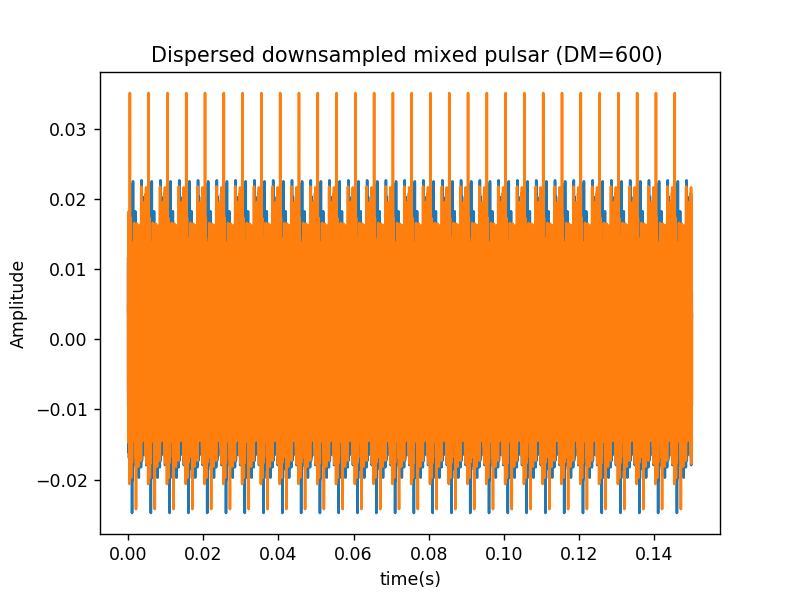

In [42]:
#Plotting the convolved signal...
figure()
plot(np.linspace(0,.15, dis_length)[::50], dispersed_downsampled_filtered_mixed_sig[::50].real)
plot(np.linspace(0,.15, dis_length)[::50], dispersed_downsampled_filtered_mixed_sig[::50].imag)
axis_labels('time(s)', 'Amplitude', 'Dispersed downsampled mixed pulsar (DM=600) ')
savefig('/home/andy/FRB_Pipeline_and_Contributions/gr-transient/jupyter/despirsed_pulse.pdf')

To simulate a real pulse, noise is added to the pulse train. This is white noise generated by choosing a random selection of values within a amplitude range of the pulse,and adding imaginary and real noise to the pulses.

In [25]:
#Noise is added to the pulse to simulate the RFI environment
noise1 = np.random.normal(0,.02,len(dispersed_downsampled_filtered_mixed_sig),)
noise2 =  np.random.normal(0,.02,len(dispersed_downsampled_filtered_mixed_sig),)*1j
dispersed_downsampled_filtered_mixed_sig = dispersed_downsampled_filtered_mixed_sig+noise1+noise2
all_noise = noise1+noise2

pre_observing_time = 2000
#noise_and_signal = np.concatenate([dispersed_downsampled_filtered_mixed_sig,all_noise])

The new pulse with noise is shown below

<IPython.core.display.Javascript object>


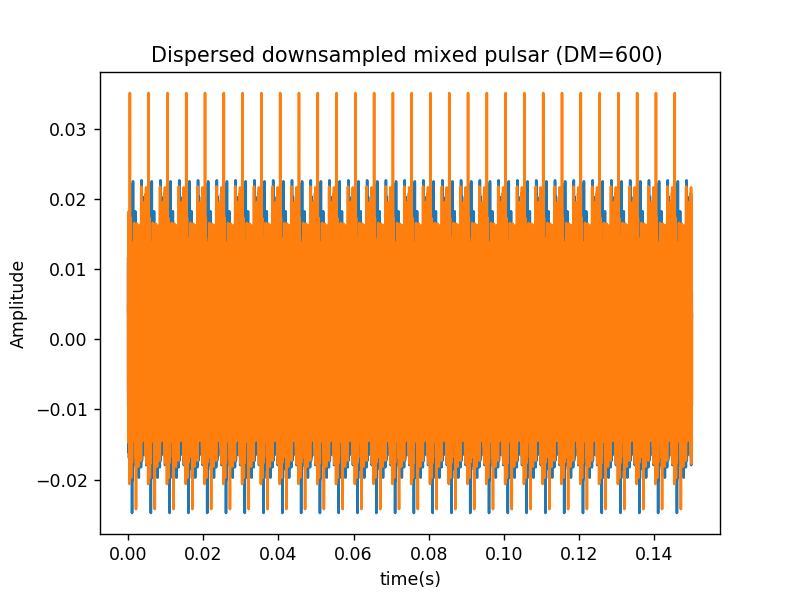

In [43]:
figure()
plot(np.linspace(0,.15, dis_length)[::50], dispersed_downsampled_filtered_mixed_sig[::50].real)
plot(np.linspace(0,.15, dis_length)[::50], dispersed_downsampled_filtered_mixed_sig[::50].imag)
axis_labels('time(s)', 'Amplitude', 'Dispersed downsampled mixed pulsar (DM=600) ')
savefig('/home/andy/FRB_Pipeline_and_Contributions/gr-transient/jupyter/despirsed_pulse_with_noise.pdf')

From this point, the pulse can be saved to a file and used as a simulated pulse inside GNUradio. The 

In [44]:
dispersed_downsampled_filtered_mixed_sig.dtype
rmax = dispersed_downsampled_filtered_mixed_sig.real.max()
print(rmax)
immax = dispersed_downsampled_filtered_mixed_sig.imag.max()
print(immax)
int_max = 2**15-2
print(int_max)
dmax = max(rmax,immax)
print(dmax)
dispersed_downsampled_filtered_mixed_signal = dispersed_downsampled_filtered_mixed_sig*int_max/dmax
dispersed_downsampled_filtered_mixed_down_s_real = dispersed_downsampled_filtered_mixed_signal.real.astype(np.int16)
dispersed_downsampled_filtered_mixed_down_s_imag = dispersed_downsampled_filtered_mixed_signal.imag.astype(np.int16)
out = np.zeros(2*len(dispersed_downsampled_filtered_mixed_down_s_real), dtype=np.int16)
out[::2] = dispersed_downsampled_filtered_mixed_down_s_real
out[1::2] = dispersed_downsampled_filtered_mixed_down_s_imag
out.tofile('/home/andy/FRB_Pipeline_and_Contributions/gr-transient/jupyter/pulse_sim_10mhz_int16_5ms_period_60dm_1400MHz_center_150ms_long.bin')

0.03260993544574703
0.03507412981501323
32766
0.03507412981501323


Now this is how this is how the pulse looks when it enters into the computer. The task is to now dedisperse it. We want an integration time that is dependent on the bandwidth. Therefore the inverse of the bandwidth is taken as the time that comes from the bandwidth. 

In [45]:
#We want a 10Msps, since this is the bandwidth
times = 1/10e6


In [46]:
print(400/6000)
print(3000000/6000)


0.06666666666666667
500.0


The number of desired frequency channels is set. This is an arbitrary choice. The integration size determins the signal to noise ratio of the data,and so an integration number of .2ms is chosen, since it is much smaller than the pulse width. Therefore, the resulting number of integrations done on the pulsar is 5. Finally, the number of timesteps for the pulse is chosen. This will dictate how many pulses will be able to be seen.

With these parameters, the FFT of the data per timestep is done, and arranged into an array as frequency by time.
In order to get this into a more conventional array, its transpose is taken, so that it is arranged frequency by time.

In [47]:

#To check that this number of frequencies, integrations, and sampling rate work
#integrate 5 samples
integration_time = 2e-4 #seconds, this is the 1/.2ms integration
step = 400 #This comes from the number of frequency channels desired. This is an educated, but arbitrary choice
integration_size = int(integration_time/(times)/step) #This comes from the 0.2ms integration that we desire. It is .2 bc .1 was too small
n_time = int(len(dispersed_downsampled_filtered_mixed_sig)/step/integration_size) #This finds the number of
                                                            #timesteps
spects = []
rec_spect = np.zeros(((n_time), step), dtype=complex) #This the is the recieved 3d plot of frequency vs time
for i in range(n_time): #This is the number of 'rows'
    for j in range(integration_size):
        spect = np.fft.fft(dispersed_downsampled_filtered_mixed_sig[(integration_size*i+j)*step : (integration_size*i+j+1)*step], 400)
        spects.append(spect)
        #This is an easy way to get the row size that we desire
        rec_spect[i] += spect*spect.conjugate() #The first timestep of the frequencies needs to be multiplied by its conjugate
        #The spetra are added together because we are 'folding' the amplitudes together. If we don't, then there appears 
        #a jump in the data.

        
        
    

In [98]:
200/8000

0.025

In [97]:
400*5*1.42*5

14200.0

In [49]:
#figure()
#plot(out)

For bench testing purposes, the pulse that has now gone through an FFT and been integrated will be compared to the integration and FFT blocks in GNUradio. 

In [99]:
rmax_FFT = rec_spect.real.max()
print(rmax)
immax_FFT = rec_spect.imag.max()
print(immax)
int_max = 2**15-2
print(int_max)
dmax_FFT = max(rmax_FFT,immax_FFT)
recieved_spect = (np.fft.fftshift(rec_spect*int_max/dmax_FFT))
rec_spect_real = recieved_spect.real.astype(np.int16)
rec_spect_imag = recieved_spect.imag.astype(np.int16)
out_spec = np.zeros((len(rec_spect_real),step), dtype=np.int16)
for i in range(step):
    out_spec[:750,i] = rec_spect_real[:,i]
out_spec.tofile('/home/andy/FRB_Pipeline_and_Contributions/gr-transient/jupyter/pulse_sim_10mhz_int16_5ms_period_60dm_1400MHz_center_150ms_long_integrated_FFT.bin')

0.03260993544574703
0.03507412981501323
32766


Then the x axis of the plot is created, where first the number of frequency channels is found, then the centre frequency of that array is set at 1400MHz

In [ ]:
n_frequencies = np.fft.fftfreq(step, 1/(10e6/1e6)) #This is the number of frequency channles.The first parameter 
                                #should be the number of chanels desired, and the second is the sample rate in MHz.
                                #This will lable the the x axis
pulse_freqs = np.fft.fftshift(n_frequencies)+Cf/1e6 #This will place the centre frequency of the plot at 1400MHz
dispersed = np.flip((np.fft.fftshift(rec_spect)), 0)#The array of the data must be flipped to match 
                                    #the units in the plot,and it must be transposed so that time is on the x axis.

The 3d graph of the dispersed pulsar is then plotted

In [ ]:
#This is the graph of the pulsar, where we can see that it is dispersed
figure()
imshow(abs(dispersed), extent=[np.amin(np.linspace(0,.15, dis_length)),\
                            np.amax(np.linspace(0,.15, dis_length)),\
                            np.amin(pulse_freqs),\
                            np.amax(pulse_freqs)],\
                              aspect='auto')
axis_labels('time(s)','Frequency (MHz)',  'Dispersed Pulsar (DM=600)')
colorbar(label = 'power')
#savefig("/home/andy/Pictures/Dispersed_pulsar_DM=600.png")
#Congrats!, we now have a dispersed pulsar


In [ ]:
dispersed

Now the pulsar is attempted to be dedispersed. Assume that the DM, nor the period of the pulsar is known. An array of possible DM's is created, along with a timestep array of when the pulses arrive. Then using the time delay equation used to disperse the pulsar, the time changes for every frequency are calculated. This is repeated for each trial dispersion measure.

In [ ]:
figure()
plot((out_spec)[3])

axis_labels('time(s)','amplitude','Dipersed pulse at one frequency over time')

In [ ]:
rec_spect

In [ ]:
DMs = np.linspace(300,700,401) #Assume that we do not know the DM for the pulsar. We must then Guess a range of DM

time_change = np.zeros((len(DMs), step)) #This is the time after the first frequency which the second frequncy arrives
for i in range(len(DMs)):
    change = 4.148e3*DMs[i]*( 1/(np.min(pulse_freqs))**2 - 1/( pulse_freqs )**2) #This is the definition for the time that the second freq arrives
    time_change[i,:] = change[:]


Using the time delays, the pulsar is now dedispersed for every guessed DM. This is done by using numpy.roll. The threshold for the roll is set by finding the time that each element in the data corresponds to, and moving elements so that they line up with their corresponding elements(come back to give better explanation)

In [ ]:
def dedispersion(DMss, frequency_channels, dispersed_pulse, time_change, n_time, integration_size): 
    """The function takes a set of DMs and dedisperses the given dispersed pulse for all the DMs given."""
    dedispers = np.zeros((len(DMss),dispersed_pulse.shape[0], dispersed_pulse.shape[1]))  #The dedispersed pulse will have the same shape as the dispersed one
    for i in range(len(DMss)):
        dedis = dispersed_pulse*0
        for j in range(frequency_channels):
            dedis[j,:] = np.roll(dispersed_pulse[j,:],-int(round(time_change[i,j]/(time_length/n_time))) )#np.roll shifts 
                #the data over after the last position and reintroduces it to the first position
        dedispers[i,:,:] = dedis
    return dedispers

Using the above definition, the pulse is dedispersed

In [ ]:
dedisperse = dedispersion(DMs, step, abs(dispersed), time_change, n_time, integration_size)  #The dedispersed pulse will have the same shape as the dispersed one


One DM value for the pulse is then plotted below

In [ ]:
figure()
imshow(abs(dedisperse[300]), extent=[np.amin(np.linspace(0,.15, dis_length)),\
                            np.amax(np.linspace(0,.15, dis_length)),\
                            np.amin(pulse_freqs),\
                            np.amax(pulse_freqs)],\
                              aspect='auto')
axis_labels('time(s)','Frequency (MHz)',  'Dedispersed Pulsar (DM=600)')
colorbar(label = 'power') #This shows the effec the dedispersion had on the 200th DM
#savefig("/home/andy/Pictures/Dedispersed_pulsar_DM=600.png")

To create a DM vs time plot, the array is summed along the frequency axis for every DM

In [ ]:
DM_measure = np.sum(dedisperse, axis = 1)

This new array is then plotted below. Note that the graph appears to have a wave in the region with the highest amplitudes. This is caused by the moire effect which can be shown as the cause with the graph following the one below(see pic for no noise pulsar)

In [ ]:
figure()
imshow((abs(DM_measure)), extent=[np.amin(np.linspace(0,.15, dis_length)),\
                            np.amax(np.linspace(0,.15, dis_length)),\
                            np.amax(DMs),np.amin(DMs)
                            ],\
                              aspect='auto')
axis_labels('time(s)','Dispersion Measure',  'Dispersion Measure vs Time of Pulsar (DM=600)')
colorbar(label = 'power') #This is the plot of DM vs time
#savefig("/home/andy/Pictures/dispersion_measure_vs_time_DM=600_no_noise.png")

In [ ]:
figure()
plot(np.linspace(0,.15, n_time),abs(DM_measure[10])-np.mean(DM_measure[297]), marker='.')
axis_labels('time(s)','Amplitude','Amplitude of DM=600')
#savefig("/home/andy/Pictures/Amplitude_vs_time_DM=600_no_noise.png")

Now the vaience of the non pulse signal needs to be found in order to calculate the signal to noise ratio. This is done by setting a threshold above a certain value, and finding peaks above that threshold. Those peaks are then assumed to belong to signal, and they are removed from the data, in order to find the base noise. The function for this is defined below.

In [ ]:
def pulsefinder(DM_data):
    allx_range = []
    ally_range = []
    for k in range(len(DM_data)):
        intensity = DM_data[k] #This defines the input data that we wish to find the peaks in
        threshold = np.mean(DM_data[k])+np.std(DM_data[k])#This creates a limit to which peaks with values
        #below this number will not be considered in the peak finder
        peaksx = [] #This is the values that the peaks are centred around
        peaksy = [] #This is the amplitude value of the peaks
        peak_dex = (list(intensity)) #This turns the input from an array to a list.
        inversep_dex=intensity[::-1] #This reverses the list of the input data
        for i in range(len(intensity)-2): #This is the loop that identifies the peaks. two previous values before and after the considered 
            #point must have values less than the point for said point to be considered a maxima
            if intensity[i] >  threshold and intensity[i-2]<intensity[i] and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i] and intensity[i+2] < intensity[i]:
                peaksx.append(np.arange(len(DM_data[k]))[i]) #Here the x value of the peak is appended to a list
                peaksy.append(intensity[i]) #The y value of the peak is appended to a list
                
        #Calculate the FWHM find all point that are part of the peak, or above the median of the data
        xrange = []
        yrange = []
        for i in range(len(peaksy)):
            halfmax = peaksy[i]/2 #This caluclates the amplitude of the FWHM
            peak_index = peak_dex.index(peaksy[i]) #This identifies the index value of the first peak
            pind=(list(inversep_dex)).index(peaksy[i]) #This identifies the index value from the reversed input data array
        
            for j in range(len((intensity[0:pind]))): #This loop finds the minimum x value that could be considered part of the pulse
                if pind == len(intensity)-1: #This ensures that a point that is at the begining is not considered as a peak
                    break
                ymin = (inversep_dex[pind:][j] - halfmax) #This subtracts the halfmax from the value. Below it is chekced if this difference is below 0
                xmins = peak_index-j #This finds the index of the corresponding value
                if ymin < 0 or inversep_dex[pind:][j] > peaksy[i] or inversep_dex[pind:][j] <= np.median(intensity) or pind+j+2 > len(intensity) or pind==0: #here the restrictions break the loop if the counter goes below zero, it the yvalue surpasses 
                 #the yvalue of the peak, or if the yvalue of the index drops below the median of the data set
                    break
            for j in range(len((intensity[0:peak_index]))):#This loop finds the maximum x value that could be considered part of the pulse
                if peak_index == len(intensity)-1: #This ensures that a point that is at the end is not considered as a peak
                    break
                ymax = (intensity[peak_index:][j] - halfmax) #Does the same as its counterpart ymax above
                xmaxs = peak_index+j #Again finds the corresponding index value
                if ymax < 0 or intensity[peak_index:][j] > peaksy[i] or intensity[peak_index:][j] < np.median(intensity) or  peak_index+j +2 > len(intensity):
                #The above line does the dame as in the previous for loop, and will also break is one of the conditions are met.
                    break
                
        
            xrange= xrange+(np.ndarray.tolist(np.arange(len(intensity))[xmins:xmaxs])) #This adds a each new set of values to the existing
            #set to make a master set of all values not considered to be noise
            yrange= yrange+(np.ndarray.tolist(intensity[xmins:xmaxs])) #This finds the y-value to these points
            
        allx_range.append(xrange)
        ally_range.append(yrange)
    return allx_range, ally_range

The function is used below to find the corresponding x and y parameters of the peaks

In [ ]:
x_ranges,yranges = pulsefinder(DM_measure)

The peaks are then set into a list, and using np.pop, values from the dispersion data are excluded is their x value is included in the list of peaks

In [ ]:
all_noised_datas = []
for k in range(len(DM_measure)):
    new_list = np.ndarray.tolist(np.sort(list(set(x_ranges[k]))))
    
    new_list = new_list+[0]#An extra incedies is added so that when the final useful value is poped below, the loop will
    #not throw an error.
    noised_data = [] #This is the resulting data points that will be considered noise
    for i in np.arange(len(DM_measure[k])):
        if i==new_list[0]: #If the counter matches the value of the x_range, the x_range value will be removed, and the 
            #corresponding data point from the Dispersion data will not be placed in the noise data
            new_list.pop(0)
            continue
        noised_data.append(DM_measure[k][i]) #The values of the DM data that will be considered noise are now added to the noise array
    all_noised_datas.append(noised_data)
all_noised_datas = np.asarray(all_noised_datas)

In [ ]:
figure()
plot(all_noised_datas[300], marker='.')
plot(all_noised_datas[285], marker='.')

#plot(DM_measure[0])
axis_labels('time(s)(samples have been cut out, so point locations not accurate)','Amplitude','Noise with a DM of 600, at DM=600')

Using the new base noise data, the std of each DM data set is found below

In [ ]:
#Now find the standard deviation and the mean of the noise for each DM. More accurate DMs will have a more accurate noise reading.
DM_std = np.zeros(len(all_noised_datas))
DM_mean = np.zeros(len(all_noised_datas))
##Find the mean and std of the noise data
for k in range(len(all_noised_datas)):
    DM_std[k] = np.std(all_noised_datas[k])
    DM_mean[k] = np.mean(all_noised_datas[k])

Finally to calculate the signal to noise ratio, the peak needs to be calculated. This is done by using those same peaks and averaging them together.

In [ ]:
def peakaverage(DM_data,adder):
    allx_range = []
    ally_range = []
    for k in range(len(DM_data)):
        intensity = DM_data[k] #This defines the input data that we wish to find the peaks in
        threshold = np.mean(DM_data[k])+np.std(DM_data[k])#This creates a limit to which peaks with values
        #below this number will not be considered in the peak finder
        peaksx = [] #This is the values that the peaks are centred around
        peaksy = [] #This is the amplitude value of the peaks
        peak_dex = (list(intensity)) #This turns the input from an array to a list.
        inversep_dex=intensity[::-1] #This reverses the list of the input data
        for i in range(len(intensity)-2): #This is the loop that identifies the peaks. two previous values before and after the considered 
            #point must have values less than the point for said point to be considered a maxima
            if intensity[i] >  threshold and intensity[i-2]<intensity[i] and intensity[i-1] <intensity[i] and intensity[i+1] < intensity[i] and intensity[i+2] < intensity[i]:
                peaksx.append(np.arange(len(DM_data[k]))[i]) #Here the x value of the peak is appended to a list
                peaksy.append(intensity[i]) #The y value of the peak is appended to a list
        xrange = []
        yrange = []
        for i in range(len(peaksy)):
            halfmax = peaksy[i]/2 #This caluclates the amplitude of the FWHM
            peak_index = peak_dex.index(peaksy[i]) #This identifies the index value of the first peak
            pind=(list(inversep_dex)).index(peaksy[i]) #This identifies the index value from the reversed input data array
        
            for j in range(len((intensity[0:pind]))): #This loop finds the minimum x value that could be considered part of the pulse
                if pind == len(intensity)-1: #This ensures that a point that is at the begining is not considered as a peak
                    break
                ymin = (inversep_dex[pind:][j] - halfmax) #This subtracts the halfmax from the value. Below it is chekced if this difference is below 0
                xmins = peak_index-j #This finds the index of the corresponding value
                if ymin < 0 or inversep_dex[pind:][j] > peaksy[i] or pind+j+2 > len(intensity) or pind==0: #here the restrictions break the loop if the counter goes below zero, it the yvalue surpasses 
                 #the yvalue of the peak, or if the yvalue of the index drops below the median of the data set
                    break
            for j in range(len((intensity[0:peak_index]))):#This loop finds the maximum x value that could be considered part of the pulse
                if peak_index == len(intensity)-1: #This ensures that a point that is at the end is not considered as a peak
                    break
                ymax = (intensity[peak_index:][j] - halfmax) #Does the same as its counterpart ymax above
                xmaxs = peak_index+j #Again finds the corresponding index value
                if ymax < 0 or intensity[peak_index:][j] > peaksy[i] or  peak_index+j +2 > len(intensity):
                #The above line does the dame as in the previous for loop, and will also break is one of the conditions are met.
                    break
                
        
            xrange= xrange+(np.ndarray.tolist(np.arange(len(intensity))[xmins:xmaxs])) #This adds a each new set of values to the existing
            #set to make a master set of all values not considered to be noise
            yrange= yrange+(np.ndarray.tolist(intensity[xmins:xmaxs])) #This finds the y-value to these points
            
        allx_range.append(xrange)
        ally_range.append(yrange)
    
    peaks_av = np.zeros(len(ally_range))
    for k in range(len(ally_range)):
        peaks_av[k] = np.mean(ally_range[k]+np.mean(adder[k]))
    
    return peaks_av

In [ ]:
DM_meaned = np.zeros((len(DM_measure),n_time))
for i in range(len(DM_measure)):
    DM_meaned[i] = DM_measure[i]-np.mean(DM_measure[i])

In [ ]:
ypeaks_av = peakaverage(DM_meaned, DM_measure)

In [ ]:
figure()
plot((ypeaks_av[:]-DM_mean[:]))

In [ ]:
#Another method to find appropriate DMs is to use matched filtering

In [ ]:
print(DM_mean[306])

In [ ]:
print(DM_mean[295])

In [ ]:
(ypeaks_av[249:350]-DM_mean[249:350])/DM_std[249:350]

In [ ]:
1500000/400